In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [2]:
# Load the MNIST dataset (built-in to TensorFlow)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build a basic feed-forward neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),  # 28*28 = 784 input features
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])


In [4]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8152 - loss: 0.6239 - val_accuracy: 0.9539 - val_loss: 0.1548
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9477 - loss: 0.1727 - val_accuracy: 0.9653 - val_loss: 0.1135
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9624 - loss: 0.1215 - val_accuracy: 0.9653 - val_loss: 0.1087
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9691 - loss: 0.0982 - val_accuracy: 0.9720 - val_loss: 0.0877
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9744 - loss: 0.0807 - val_accuracy: 0.9736 - val_loss: 0.0897


In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.0974
Test accuracy: 0.9751
Test loss: 0.0822


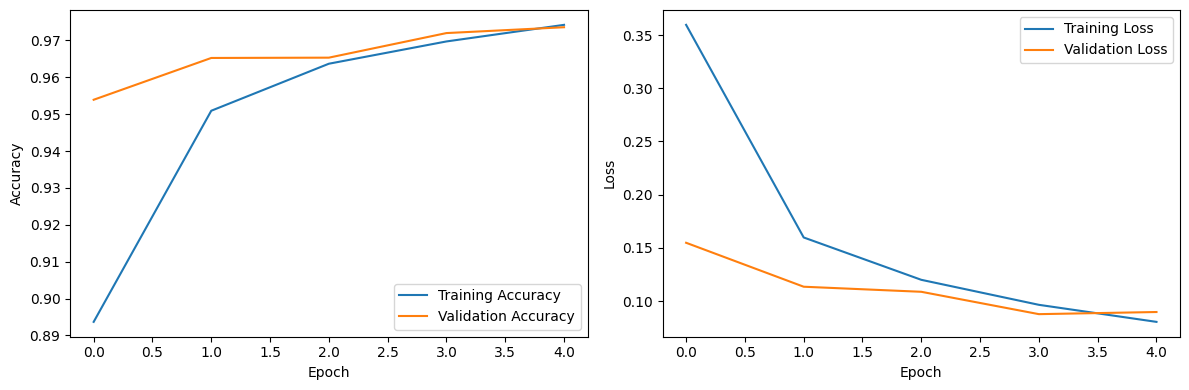

In [6]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predictions shape: (5, 10)
Predicted classes: [7 2 1 0 4]
Actual classes:    [7 2 1 0 4]


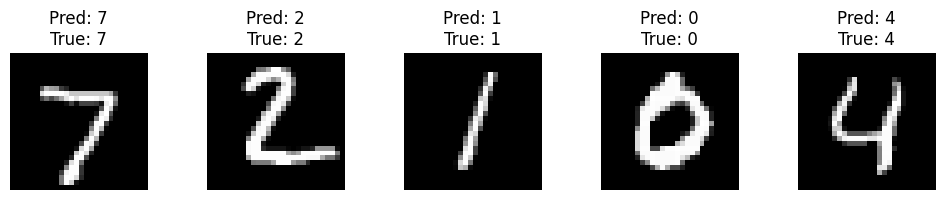

In [7]:
# Make predictions on a few test samples
predictions = model.predict(x_test[:5])
print("Predictions shape:", predictions.shape)
print("Predicted classes:", np.argmax(predictions, axis=1))
print("Actual classes:   ", y_test[:5])

# Visualize a few test images with predictions
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()